# <center> INTRODUCTION À PYTHON POUR L'ÉCONOMIE APPLIQUÉE</center>
## <center> EXERCICES : 18.10.2022</center>
#### <center>Michal Urdanivia (UGA)</center>
#### <center> michal.wong-urdanivia@univ-grenoble-alpes.fr </center>

### <center> INFORMATIONS </center>

**Structure du devoir:** chaque devoir consiste en exercices et problèmes. Les premiers ont pour objet de s'entraîner à l'utilisation de techniques spécifiques. Les second portent sur l'application des techniques à des problèmes économiques. 

**Corrections:** elles seront déposés sur le dépôt github du cours et seront brièvement revues en séance.

**Solutions multiples:** les solutions données ne sont qu'un exemple parmi les différentes façons de traiter un problème d'analyse numérique et d'aboutir à **la même solution**.

### <center>OPTIMISATION ET AFFICHAGE </center>

#### Fonctions

Implémentez une version Python de la fonction suivante,

$$ 
u(q_1,q_2) = (\alpha q_1^{-\beta} + (1-\alpha) q_2^{-\beta})^{-1/\beta}.
$$

**Remarque**: les paramètres $\alpha$ et $\beta$ ont des valeurs par défaut égales à 0.5 et 1 respectivement.

**Réponse**

In [1]:
# réponse/code 
def u(q_1, q_2, alpha = 0.5, beta = 1):
    return (alpha * (q_1 ** -beta) + (1 - alpha) * (q_2 ** -beta))**(-1/beta)

### Affichage

In [4]:
q1_vec = [1.05,1.3,2.3,2.5,3.1]
q2_vec = [1.05,1.3,2.3,2.5,3.1]

Construire une fonction Python  `print_tableau(q1_vec,q2_vec)` pour afficher les valeurs `u(q1,q2)` sous la forme d'un tableau $ 5\times 5 $ où chaque entrée est un résultat de l'évaluation de `u(,.,)` selon les valeurs prises par `q1`et `q2` dans `q1_vec`et `q2_vec`. Vous pouvez vous appuyer sur le code suivant:

In [5]:
# Réponse:
def print_tableau(q1_vec,q2_vec):
    
    # a. texte vide
    text = ''
    
    # b. haut du tableau
    text += f'{"":3s}'
    for j, q2 in enumerate(q2_vec):
       text += f'{j:6d}' 
    text += '\n' # saut de ligne
    
    # c. coeur
    for i,q1 in enumerate(q1_vec):
        if i > 0:
            text += '\n' # saut de ligne
        text += f'{i:3d} ' # gauche
        for j, q2 in enumerate(q2_vec):
            text += f'{u(q1, q2):6.3f}' # ligne à compléter
    
    # d. affichage
    print(text)

print_tableau(q1_vec,q2_vec)

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


### matplotlib

Reproduire le graphique ci-dessous qui représente $u(q_1,q_2)$ en utilisant la fonction `meshgrid`  de _numpy_ et la fonction `plot_surface` de _matplotlib_. 

In [6]:
# évaluation de la fonction d'utilité 
import numpy as np
q1_grid,q2_grid = np.meshgrid(q1_vec,q2_vec,indexing='ij')
u_grid = u(q1_grid,q2_grid)

# imports de modules
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # pour les couleurs


**Réponse**

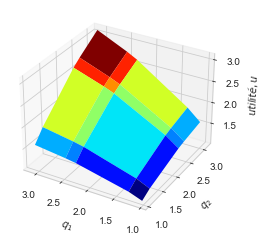

In [8]:
# a. graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(q1_grid,q2_grid,u_grid,cmap=cm.jet)

# b. ajout de labels
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$utilité,u$')

# c. inversion des axes
ax.invert_xaxis()

### Optimisation 

Considérons le problème de minimisation:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Résoudre ce problème et illustrez les résultats.

In [ ]:
# mettre à jour le code suivant:

# a. définition de la fonction
def f(x):
    return 0 # cette ligne est erronée(à corriger)

# b. solution utilisant une boucle
import numpy as np
n = 100
q_vec = np.linspace(-10,10,n)
f_vec = np.empty(n)

f_best = np.inf # maximum initial
x_best = np.nan # ce n'est pas un nombre

for i,x in enumerate(x_vec):
    f_now = f_vec[i] = f(x)
    # lignes manquantes

# c. solution utilisant scipy optimize
from scipy import optimize
x_guess = [0]      
# ligne manquante, indication: objective_function = lambda x: ? --> fonction objectif
# ligne manquante, indication: res = optimize.minimize(?)
# x_best_scipy = res.x[0]
# f_best_scipy = res.fun

# d. affichage
# lignes manquantes

# e. graphique
# lignes manquante

**Réponse:**

### <center>PROBLÈME DU CONSOMMATEUR </center>

Considérons le panier à $M$ biens, $q=(q_1,q_2,\dots,q_M)$, et le **problème de maximisation de l'utilité** avec un revenu exogène $R$, et le vecteur de prix $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{align*}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{q_{1},q_{2},\dots,q_M} q_{1}^{\alpha_1} q_{2}^{\alpha_2} \dots q_{M}^{\alpha_M} \\
 & \text{s.t.}\\
DT & = \sum_{i=1}^{M}p_{i}q_{i} \leq R,\,\,\,p_{1},p_{2},\dots,p_M,R>0\\
q_{1},q_{2},\dots,x_M & \geq 0
\end{align*}
$$

**Problème:** résoudre ce problème dans le cas de paniers à 5 biens pour des paramètres $ \alpha = (\alpha_1,\alpha_2, \dots,\alpha_5)$, des prix, et le revenu, arbitraires. Dans un premier temps utilisez une boucle, et ensuite un solveur numérique.

Vous pouvez utiliser les fonctions suivantes:

In [ ]:
def utilite_fn(q,alpha):
    # assurez vous que vous comprenez ce que fait la fonction

    u = 1
    for q_now,alpha_now in zip(q,alpha):
        u *= np.max(q_now,0)**alpha_now
    return u
    
def depenses_fn(q,p):
    # ensure you understand what this function is doing

    DT = 0
    for x_now,p_now in zip(q,p):
        DT += p_now*x_now
    return DT

def affichage_solution(q,alpha,R,p):
    # vous pouvez utiliser cette fonction
    
    # a. x values
    text = 'q = ['
    for q_now in q:
        text += f'{q_now:.2f} '
    text += f']\n'
    
    # b. utilité
    u = utilite_fn(q,alpha)    
    text += f'utilité = {u:.3f}\n'
    
    # c. dépenses vs revenu
    DT =  depenses_fn(q,p)
    text += f'DT = {DT:.2f} <= R = {R:.2f}\n'
    
    # d. parts dans les dépenses
    dt = p*q/R
    text += 'parts dans les des dépenses = ['
    for dt_now in dt:
        text += f'{dt_now:.2f} '
    text += f']'        
        
    print(text)

Vous pouvez retenir les valeurs suivantes des paramètres:

In [ ]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
R = 10

In [ ]:
# Votre réponse/code ici

Solution avec une boucle